In [ ]:
import json
from pathlib import Path
from evaluate import load
from tqdm import tqdm
import numpy as np
import pandas as pd

Evaluating pipelines: 100%|██████████| 100/100 [00:35<00:00,  2.79it/s]


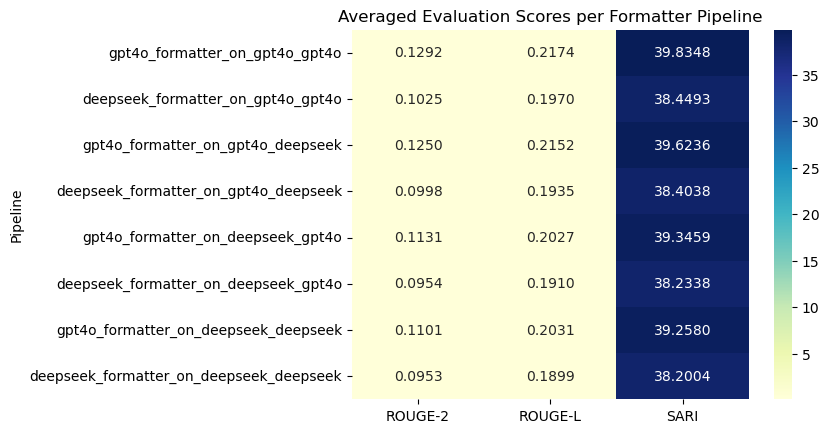

In [2]:

# Load evaluation datasets
with open("results/formatter_results.json", "r", encoding="utf-8") as f:
    formatted_outputs = json.load(f)

with open("../data/500_pairs.json", "r", encoding="utf-8") as f:
    gold_data = json.load(f)[:100]  # Limit to first 100

# Extract targets
targets = [entry["target"] for entry in gold_data]

# Define pipeline keys
pipeline_keys = [
    "gpt4o_formatter_on_gpt4o_gpt4o",
    "deepseek_formatter_on_gpt4o_gpt4o",
    "gpt4o_formatter_on_gpt4o_deepseek",
    "deepseek_formatter_on_gpt4o_deepseek",
    "gpt4o_formatter_on_deepseek_gpt4o",
    "deepseek_formatter_on_deepseek_gpt4o",
    "gpt4o_formatter_on_deepseek_deepseek",
    "deepseek_formatter_on_deepseek_deepseek",
]

# Load metrics
rouge = load("rouge")
sari = load("sari")

# Store results
results = {k: {"ROUGE-2": [], "ROUGE-L": [], "SARI": []} for k in pipeline_keys}

# Evaluate
for entry, target in tqdm(zip(formatted_outputs, targets), total=100, desc="Evaluating pipelines"):
    for k in pipeline_keys:
        prediction = entry.get(k, "").strip()

        # ROUGE
        rouge_scores = rouge.compute(predictions=[prediction], references=[target], rouge_types=["rouge2", "rougeL"])
        results[k]["ROUGE-2"].append(rouge_scores["rouge2"])
        results[k]["ROUGE-L"].append(rouge_scores["rougeL"])

        # SARI
        sari_score = sari.compute(predictions=[prediction], references=[[target]], sources=[entry["source"]])
        results[k]["SARI"].append(sari_score["sari"])

# Average
final_scores = {
    k: {
        "ROUGE-2": sum(v["ROUGE-2"]) / len(v["ROUGE-2"]),
        "ROUGE-L": sum(v["ROUGE-L"]) / len(v["ROUGE-L"]),
        "SARI": sum(v["SARI"]) / len(v["SARI"]),
    }
    for k, v in results.items()
}

# Create final DataFrame
df = pd.DataFrame.from_dict(final_scores, orient="index")
df.index.name = "Pipeline"
df.reset_index(inplace=True)
df = df[["Pipeline", "ROUGE-2", "ROUGE-L", "SARI"]]

# Display
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(df.set_index("Pipeline"), annot=True, cmap="YlGnBu", fmt=".4f")
plt.title("Averaged Evaluation Scores per Formatter Pipeline")
plt.show()


In [15]:
output_path = Path("pipeline_eval_results")
output_path.mkdir(parents=True, exist_ok=True)

# Convert and save
json_output = df.set_index("Pipeline").to_dict(orient="index")
with open(output_path / "metric_eval_summary.json", "w", encoding="utf-8") as f:
    json.dump(json_output, f, indent=2)

LLM Judging:   1%|          | 1/100 [00:06<10:18,  6.25s/it]

🔍 Cleaned content:
 {
    "gpt4o_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 8,
        "syntactic_simplicity": 7,
        "loss_of_information": 2,
        "distortion_of_information": 1
    },
    "deepseek_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 8,
        "syntactic_simplicity": 8,


LLM Judging:   2%|▏         | 2/100 [00:14<11:51,  7.26s/it]

🔍 Cleaned content:
 {
    "gpt4o_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 8,
        "syntactic_simplicity": 8,
        "loss_of_information": 7,
        "distortion_of_information": 9
    },
    "deepseek_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 8,
        "syntactic_simplicity": 8,


LLM Judging:   3%|▎         | 3/100 [00:19<09:56,  6.15s/it]

🔍 Cleaned content:
 {
    "gpt4o_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 8,
        "syntactic_simplicity": 8,
        "loss_of_information": 8,
        "distortion_of_information": 10
    },
    "deepseek_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 8,
        "syntactic_simplicity": 8


LLM Judging:   4%|▍         | 4/100 [00:23<08:39,  5.41s/it]

🔍 Cleaned content:
 {
    "gpt4o_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 8,
        "syntactic_simplicity": 8,
        "loss_of_information": 1,
        "distortion_of_information": 0
    },
    "deepseek_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 8,
        "syntactic_simplicity": 8,


LLM Judging:   5%|▌         | 5/100 [00:29<08:59,  5.68s/it]

🔍 Cleaned content:
 {
    "gpt4o_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 8,
        "syntactic_simplicity": 7,
        "loss_of_information": 3,
        "distortion_of_information": 9
    },
    "deepseek_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 8,
        "syntactic_simplicity": 8,


LLM Judging:   6%|▌         | 6/100 [00:35<08:55,  5.70s/it]

🔍 Cleaned content:
 {
    "gpt4o_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 8,
        "syntactic_simplicity": 8,
        "loss_of_information": 9,
        "distortion_of_information": 10
    },
    "deepseek_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 9,
        "syntactic_simplicity": 9


LLM Judging:   7%|▋         | 7/100 [00:39<08:17,  5.35s/it]

🔍 Cleaned content:
 {
    "gpt4o_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 8,
        "syntactic_simplicity": 8,
        "loss_of_information": 9,
        "distortion_of_information": 10
    },
    "deepseek_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 8,
        "syntactic_simplicity": 8


LLM Judging:   8%|▊         | 8/100 [00:46<08:40,  5.66s/it]

🔍 Cleaned content:
 {
    "gpt4o_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 8,
        "syntactic_simplicity": 8,
        "loss_of_information": 2,
        "distortion_of_information": 9
    },
    "deepseek_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 9,
        "syntactic_simplicity": 9,


LLM Judging:   9%|▉         | 9/100 [00:50<08:10,  5.39s/it]

🔍 Cleaned content:
 {
    "gpt4o_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 8,
        "syntactic_simplicity": 7,
        "loss_of_information": 2,
        "distortion_of_information": 1
    },
    "deepseek_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 8,
        "syntactic_simplicity": 7,


LLM Judging:  10%|█         | 10/100 [00:57<08:25,  5.61s/it]

🔍 Cleaned content:
 {
    "gpt4o_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 8,
        "syntactic_simplicity": 8,
        "loss_of_information": 2,
        "distortion_of_information": 8
    },
    "deepseek_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 8,
        "syntactic_simplicity": 8,


LLM Judging:  11%|█         | 11/100 [01:02<08:26,  5.69s/it]

🔍 Cleaned content:
 {
    "gpt4o_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 7,
        "syntactic_simplicity": 7,
        "loss_of_information": 2,
        "distortion_of_information": 1
    },
    "deepseek_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 7,
        "syntactic_simplicity": 7,
⚠️ Skipped malformed entry at index 10, key: deepseek_formatter_on_gpt4o_deepseek
⚠️ Skipped malformed entry at index 10, key: gpt4o_formatter_on_deepseek_deepseek


LLM Judging:  12%|█▏        | 12/100 [01:08<08:12,  5.59s/it]

🔍 Cleaned content:
 {
    "gpt4o_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 8,
        "syntactic_simplicity": 8,
        "loss_of_information": 9,
        "distortion_of_information": 10
    },
    "deepseek_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 9,
        "syntactic_simplicity": 9


LLM Judging:  13%|█▎        | 13/100 [01:16<09:27,  6.53s/it]

🔍 Cleaned content:
 {
    "gpt4o_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 8,
        "syntactic_simplicity": 7,
        "loss_of_information": 2,
        "distortion_of_information": 3
    },
    "deepseek_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 8,
        "syntactic_simplicity": 8,


LLM Judging:  14%|█▍        | 14/100 [01:22<08:49,  6.16s/it]

🔍 Cleaned content:
 {
    "gpt4o_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 8,
        "syntactic_simplicity": 8,
        "loss_of_information": 9,
        "distortion_of_information": 10
    },
    "deepseek_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 8,
        "syntactic_simplicity": 8


LLM Judging:  15%|█▌        | 15/100 [01:28<08:43,  6.16s/it]

🔍 Cleaned content:
 {
    "gpt4o_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 8,
        "syntactic_simplicity": 8,
        "loss_of_information": 7,
        "distortion_of_information": 9
    },
    "deepseek_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 8,
        "syntactic_simplicity": 8,


LLM Judging:  16%|█▌        | 16/100 [01:33<08:18,  5.93s/it]

🔍 Cleaned content:
 {
    "gpt4o_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 8,
        "syntactic_simplicity": 7,
        "loss_of_information": 2,
        "distortion_of_information": 1
    },
    "deepseek_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 8,
        "syntactic_simplicity": 8,


LLM Judging:  17%|█▋        | 17/100 [01:39<07:54,  5.71s/it]

🔍 Cleaned content:
 {
    "gpt4o_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 8,
        "syntactic_simplicity": 8,
        "loss_of_information": 9,
        "distortion_of_information": 10
    },
    "deepseek_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 9,
        "syntactic_simplicity": 9


LLM Judging:  18%|█▊        | 18/100 [01:44<07:32,  5.51s/it]

🔍 Cleaned content:
 {
    "gpt4o_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 7,
        "syntactic_simplicity": 7,
        "loss_of_information": 9,
        "distortion_of_information": 10
    },
    "deepseek_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 8,
        "syntactic_simplicity": 8


LLM Judging:  19%|█▉        | 19/100 [01:49<07:29,  5.55s/it]

🔍 Cleaned content:
 {
    "gpt4o_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 8,
        "syntactic_simplicity": 8,
        "loss_of_information": 2,
        "distortion_of_information": 7
    },
    "deepseek_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 8,
        "syntactic_simplicity": 8,


LLM Judging:  20%|██        | 20/100 [01:59<08:55,  6.70s/it]

🔍 Cleaned content:
 {
    "gpt4o_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 8,
        "syntactic_simplicity": 8,
        "loss_of_information": 9,
        "distortion_of_information": 10
    },
    "deepseek_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 8,
        "syntactic_simplicity": 8


LLM Judging:  21%|██        | 21/100 [02:05<08:31,  6.47s/it]

🔍 Cleaned content:
 {
    "gpt4o_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 8,
        "syntactic_simplicity": 8,
        "loss_of_information": 7,
        "distortion_of_information": 9
    },
    "deepseek_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 8,
        "syntactic_simplicity": 8,


LLM Judging:  22%|██▏       | 22/100 [02:11<08:20,  6.41s/it]

🔍 Cleaned content:
 {
    "gpt4o_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 8,
        "syntactic_simplicity": 8,
        "loss_of_information": 9,
        "distortion_of_information": 10
    },
    "deepseek_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 8,
        "syntactic_simplicity": 8


LLM Judging:  23%|██▎       | 23/100 [02:16<07:43,  6.02s/it]

🔍 Cleaned content:
 {
    "gpt4o_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 8,
        "syntactic_simplicity": 8,
        "loss_of_information": 2,
        "distortion_of_information": 1
    },
    "deepseek_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 8,
        "syntactic_simplicity": 8,


LLM Judging:  24%|██▍       | 24/100 [02:20<06:58,  5.51s/it]

🔍 Cleaned content:
 {
    "gpt4o_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 8,
        "syntactic_simplicity": 8,
        "loss_of_information": 7,
        "distortion_of_information": 9
    },
    "deepseek_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 8,
        "syntactic_simplicity": 8,


LLM Judging:  25%|██▌       | 25/100 [02:26<06:53,  5.51s/it]

🔍 Cleaned content:
 {
    "gpt4o_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 8,
        "syntactic_simplicity": 7,
        "loss_of_information": 2,
        "distortion_of_information": 8
    },
    "deepseek_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 9,
        "syntactic_simplicity": 8,


LLM Judging:  26%|██▌       | 26/100 [02:33<07:16,  5.90s/it]

🔍 Cleaned content:
 {
    "gpt4o_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 8,
        "syntactic_simplicity": 8,
        "loss_of_information": 7,
        "distortion_of_information": 9
    },
    "deepseek_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 8,
        "syntactic_simplicity": 8,


LLM Judging:  27%|██▋       | 27/100 [02:38<06:59,  5.75s/it]

🔍 Cleaned content:
 {
    "gpt4o_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 8,
        "syntactic_simplicity": 7,
        "loss_of_information": 8,
        "distortion_of_information": 9
    },
    "deepseek_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 8,
        "syntactic_simplicity": 8,


LLM Judging:  28%|██▊       | 28/100 [02:51<09:24,  7.84s/it]

🔍 Cleaned content:
 {
    "gpt4o_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 8,
        "syntactic_simplicity": 8,
        "loss_of_information": 9,
        "distortion_of_information": 10
    },
    "deepseek_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 9,
        "syntactic_simplicity": 9


LLM Judging:  29%|██▉       | 29/100 [02:57<08:36,  7.28s/it]

🔍 Cleaned content:
 {
    "gpt4o_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 8,
        "syntactic_simplicity": 8,
        "loss_of_information": 2,
        "distortion_of_information": 1
    },
    "deepseek_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 8,
        "syntactic_simplicity": 8,


LLM Judging:  30%|███       | 30/100 [03:06<09:09,  7.85s/it]

🔍 Cleaned content:
 {
    "gpt4o_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 8,
        "syntactic_simplicity": 8,
        "loss_of_information": 2,
        "distortion_of_information": 1
    },
    "deepseek_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 8,
        "syntactic_simplicity": 8,


LLM Judging:  31%|███       | 31/100 [03:10<07:43,  6.72s/it]

🔍 Cleaned content:
 {
    "gpt4o_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 8,
        "syntactic_simplicity": 8,
        "loss_of_information": 2,
        "distortion_of_information": 8
    },
    "deepseek_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 8,
        "syntactic_simplicity": 8,


LLM Judging:  32%|███▏      | 32/100 [03:16<07:25,  6.55s/it]

🔍 Cleaned content:
 {
    "gpt4o_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 8,
        "syntactic_simplicity": 8,
        "loss_of_information": 9,
        "distortion_of_information": 10
    },
    "deepseek_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 9,
        "syntactic_simplicity": 9


LLM Judging:  33%|███▎      | 33/100 [03:21<06:50,  6.12s/it]

🔍 Cleaned content:
 {
    "gpt4o_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 8,
        "syntactic_simplicity": 8,
        "loss_of_information": 2,
        "distortion_of_information": 8
    },
    "deepseek_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 8,
        "syntactic_simplicity": 8,


LLM Judging:  34%|███▍      | 34/100 [03:27<06:34,  5.98s/it]

🔍 Cleaned content:
 {
    "gpt4o_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 8,
        "syntactic_simplicity": 8,
        "loss_of_information": 9,
        "distortion_of_information": 10
    },
    "deepseek_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 8,
        "syntactic_simplicity": 8


LLM Judging:  35%|███▌      | 35/100 [03:33<06:30,  6.01s/it]

🔍 Cleaned content:
 {
    "gpt4o_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 8,
        "syntactic_simplicity": 7,
        "loss_of_information": 2,
        "distortion_of_information": 1
    },
    "deepseek_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 8,
        "syntactic_simplicity": 8,


LLM Judging:  36%|███▌      | 36/100 [03:39<06:35,  6.17s/it]

🔍 Cleaned content:
 {
    "gpt4o_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 8,
        "syntactic_simplicity": 8,
        "loss_of_information": 9,
        "distortion_of_information": 10
    },
    "deepseek_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 8,
        "syntactic_simplicity": 8


LLM Judging:  37%|███▋      | 37/100 [03:45<06:11,  5.90s/it]

🔍 Cleaned content:
 {
    "gpt4o_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 8,
        "syntactic_simplicity": 8,
        "loss_of_information": 2,
        "distortion_of_information": 1
    },
    "deepseek_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 9,
        "syntactic_simplicity": 9,


LLM Judging:  38%|███▊      | 38/100 [03:50<05:57,  5.76s/it]

🔍 Cleaned content:
 {
    "gpt4o_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 8,
        "syntactic_simplicity": 8,
        "loss_of_information": 9,
        "distortion_of_information": 10
    },
    "deepseek_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 8,
        "syntactic_simplicity": 8


LLM Judging:  39%|███▉      | 39/100 [03:56<05:43,  5.63s/it]

🔍 Cleaned content:
 {
    "gpt4o_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 8,
        "syntactic_simplicity": 8,
        "loss_of_information": 9,
        "distortion_of_information": 10
    },
    "deepseek_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 8,
        "syntactic_simplicity": 8


LLM Judging:  40%|████      | 40/100 [04:01<05:28,  5.48s/it]

🔍 Cleaned content:
 {
    "gpt4o_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 8,
        "syntactic_simplicity": 8,
        "loss_of_information": 7,
        "distortion_of_information": 9
    },
    "deepseek_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 8,
        "syntactic_simplicity": 8,


LLM Judging:  41%|████      | 41/100 [04:06<05:18,  5.40s/it]

🔍 Cleaned content:
 {
    "gpt4o_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 9,
        "syntactic_simplicity": 9,
        "loss_of_information": 8,
        "distortion_of_information": 10
    },
    "deepseek_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 9,
        "syntactic_simplicity": 9


LLM Judging:  42%|████▏     | 42/100 [04:11<05:08,  5.31s/it]

🔍 Cleaned content:
 {
    "gpt4o_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 7,
        "syntactic_simplicity": 7,
        "loss_of_information": 2,
        "distortion_of_information": 8
    },
    "deepseek_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 8,
        "syntactic_simplicity": 8,


LLM Judging:  43%|████▎     | 43/100 [04:16<04:49,  5.08s/it]

🔍 Cleaned content:
 {
    "gpt4o_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 8,
        "syntactic_simplicity": 8,
        "loss_of_information": 1,
        "distortion_of_information": 10
    },
    "deepseek_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 9,
        "syntactic_simplicity": 9


LLM Judging:  44%|████▍     | 44/100 [04:21<04:48,  5.16s/it]

🔍 Cleaned content:
 {
    "gpt4o_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 8,
        "syntactic_simplicity": 8,
        "loss_of_information": 2,
        "distortion_of_information": 8
    },
    "deepseek_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 8,
        "syntactic_simplicity": 8,


LLM Judging:  45%|████▌     | 45/100 [04:25<04:23,  4.79s/it]

🔍 Cleaned content:
 {
    "gpt4o_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 8,
        "syntactic_simplicity": 8,
        "loss_of_information": 9,
        "distortion_of_information": 10
    },
    "deepseek_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 8,
        "syntactic_simplicity": 8


LLM Judging:  46%|████▌     | 46/100 [04:31<04:39,  5.17s/it]

🔍 Cleaned content:
 {
    "gpt4o_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 8,
        "syntactic_simplicity": 8,
        "loss_of_information": 7,
        "distortion_of_information": 9
    },
    "deepseek_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 9,
        "syntactic_simplicity": 9,


LLM Judging:  47%|████▋     | 47/100 [04:36<04:33,  5.16s/it]

🔍 Cleaned content:
 {
    "gpt4o_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 8,
        "syntactic_simplicity": 8,
        "loss_of_information": 9,
        "distortion_of_information": 10
    },
    "deepseek_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 9,
        "syntactic_simplicity": 9


LLM Judging:  48%|████▊     | 48/100 [04:42<04:43,  5.45s/it]

🔍 Cleaned content:
 {
    "gpt4o_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 8,
        "syntactic_simplicity": 8,
        "loss_of_information": 9,
        "distortion_of_information": 10
    },
    "deepseek_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 9,
        "syntactic_simplicity": 9


LLM Judging:  49%|████▉     | 49/100 [04:48<04:45,  5.60s/it]

🔍 Cleaned content:
 {
    "gpt4o_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 8,
        "syntactic_simplicity": 8,
        "loss_of_information": 7,
        "distortion_of_information": 9
    },
    "deepseek_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 9,
        "syntactic_simplicity": 9,


LLM Judging:  50%|█████     | 50/100 [04:55<04:53,  5.88s/it]

🔍 Cleaned content:
 {
    "gpt4o_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 7,
        "syntactic_simplicity": 7,
        "loss_of_information": 8,
        "distortion_of_information": 9
    },
    "deepseek_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 8,
        "syntactic_simplicity": 8,


LLM Judging:  51%|█████     | 51/100 [05:00<04:37,  5.66s/it]

🔍 Cleaned content:
 {
    "gpt4o_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 8,
        "syntactic_simplicity": 8,
        "loss_of_information": 9,
        "distortion_of_information": 10
    },
    "deepseek_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 8,
        "syntactic_simplicity": 8


LLM Judging:  52%|█████▏    | 52/100 [05:09<05:16,  6.60s/it]

🔍 Cleaned content:
 {
    "gpt4o_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 8,
        "syntactic_simplicity": 8,
        "loss_of_information": 2,
        "distortion_of_information": 0
    },
    "deepseek_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 8,
        "syntactic_simplicity": 8,


LLM Judging:  53%|█████▎    | 53/100 [05:17<05:41,  7.26s/it]

🔍 Cleaned content:
 {
    "gpt4o_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 8,
        "syntactic_simplicity": 8,
        "loss_of_information": 7,
        "distortion_of_information": 9
    },
    "deepseek_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 9,
        "syntactic_simplicity": 9,


LLM Judging:  54%|█████▍    | 54/100 [05:30<06:48,  8.87s/it]

🔍 Cleaned content:
 {
    "gpt4o_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 8,
        "syntactic_simplicity": 8,
        "loss_of_information": 9,
        "distortion_of_information": 10
    },
    "deepseek_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 8,
        "syntactic_simplicity": 8


LLM Judging:  55%|█████▌    | 55/100 [05:35<05:47,  7.71s/it]

🔍 Cleaned content:
 {
    "gpt4o_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 8,
        "syntactic_simplicity": 8,
        "loss_of_information": 7,
        "distortion_of_information": 9
    },
    "deepseek_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 8,
        "syntactic_simplicity": 8,


LLM Judging:  56%|█████▌    | 56/100 [05:40<05:07,  6.99s/it]

🔍 Cleaned content:
 {
    "gpt4o_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 8,
        "syntactic_simplicity": 8,
        "loss_of_information": 9,
        "distortion_of_information": 10
    },
    "deepseek_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 8,
        "syntactic_simplicity": 8


LLM Judging:  57%|█████▋    | 57/100 [05:48<05:05,  7.11s/it]

🔍 Cleaned content:
 {
    "gpt4o_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 8,
        "syntactic_simplicity": 8,
        "loss_of_information": 2,
        "distortion_of_information": 7
    },
    "deepseek_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 8,
        "syntactic_simplicity": 8,


LLM Judging:  58%|█████▊    | 58/100 [05:53<04:34,  6.54s/it]

🔍 Cleaned content:
 {
    "gpt4o_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 8,
        "syntactic_simplicity": 8,
        "loss_of_information": 1,
        "distortion_of_information": 0
    },
    "deepseek_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 8,
        "syntactic_simplicity": 8,


LLM Judging:  59%|█████▉    | 59/100 [05:58<04:07,  6.03s/it]

🔍 Cleaned content:
 {
    "gpt4o_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 8,
        "syntactic_simplicity": 8,
        "loss_of_information": 7,
        "distortion_of_information": 9
    },
    "deepseek_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 8,
        "syntactic_simplicity": 8,


LLM Judging:  60%|██████    | 60/100 [06:03<03:53,  5.84s/it]

🔍 Cleaned content:
 {
    "gpt4o_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 8,
        "syntactic_simplicity": 8,
        "loss_of_information": 2,
        "distortion_of_information": 8
    },
    "deepseek_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 8,
        "syntactic_simplicity": 8,


LLM Judging:  61%|██████    | 61/100 [06:09<03:52,  5.96s/it]

🔍 Cleaned content:
 {
    "gpt4o_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 8,
        "syntactic_simplicity": 8,
        "loss_of_information": 2,
        "distortion_of_information": 1
    },
    "deepseek_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 8,
        "syntactic_simplicity": 8,


LLM Judging:  62%|██████▏   | 62/100 [06:14<03:26,  5.43s/it]

🔍 Cleaned content:
 {
    "gpt4o_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 8,
        "syntactic_simplicity": 8,
        "loss_of_information": 2,
        "distortion_of_information": 1
    },
    "deepseek_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 9,
        "syntactic_simplicity": 9,


LLM Judging:  63%|██████▎   | 63/100 [06:19<03:23,  5.49s/it]

🔍 Cleaned content:
 {
    "gpt4o_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 8,
        "syntactic_simplicity": 8,
        "loss_of_information": 2,
        "distortion_of_information": 8
    },
    "deepseek_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 8,
        "syntactic_simplicity": 8,


LLM Judging:  64%|██████▍   | 64/100 [06:26<03:28,  5.80s/it]

🔍 Cleaned content:
 {
    "gpt4o_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 8,
        "syntactic_simplicity": 8,
        "loss_of_information": 7,
        "distortion_of_information": 9
    },
    "deepseek_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 8,
        "syntactic_simplicity": 8,


LLM Judging:  65%|██████▌   | 65/100 [06:32<03:23,  5.82s/it]

🔍 Cleaned content:
 {
    "gpt4o_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 8,
        "syntactic_simplicity": 8,
        "loss_of_information": 2,
        "distortion_of_information": 5
    },
    "deepseek_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 8,
        "syntactic_simplicity": 8,


LLM Judging:  66%|██████▌   | 66/100 [06:38<03:25,  6.06s/it]

🔍 Cleaned content:
 {
    "gpt4o_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 8,
        "syntactic_simplicity": 8,
        "loss_of_information": 2,
        "distortion_of_information": 1
    },
    "deepseek_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 9,
        "syntactic_simplicity": 9,


LLM Judging:  67%|██████▋   | 67/100 [06:46<03:32,  6.44s/it]

🔍 Cleaned content:
 {
    "gpt4o_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 8,
        "syntactic_simplicity": 8,
        "loss_of_information": 9,
        "distortion_of_information": 10
    },
    "deepseek_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 9,
        "syntactic_simplicity": 9


LLM Judging:  68%|██████▊   | 68/100 [06:52<03:24,  6.40s/it]

🔍 Cleaned content:
 {
    "gpt4o_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 8,
        "syntactic_simplicity": 8,
        "loss_of_information": 9,
        "distortion_of_information": 9
    },
    "deepseek_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 8,
        "syntactic_simplicity": 8,


LLM Judging:  69%|██████▉   | 69/100 [06:59<03:21,  6.49s/it]

🔍 Cleaned content:
 {
    "gpt4o_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 8,
        "syntactic_simplicity": 8,
        "loss_of_information": 9,
        "distortion_of_information": 10
    },
    "deepseek_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 8,
        "syntactic_simplicity": 8


LLM Judging:  70%|███████   | 70/100 [07:05<03:11,  6.39s/it]

🔍 Cleaned content:
 {
    "gpt4o_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 8,
        "syntactic_simplicity": 8,
        "loss_of_information": 7,
        "distortion_of_information": 9
    },
    "deepseek_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 9,
        "syntactic_simplicity": 9,


LLM Judging:  71%|███████   | 71/100 [07:12<03:12,  6.62s/it]

🔍 Cleaned content:
 {
    "gpt4o_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 8,
        "syntactic_simplicity": 8,
        "loss_of_information": 9,
        "distortion_of_information": 10
    },
    "deepseek_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 8,
        "syntactic_simplicity": 8


LLM Judging:  72%|███████▏  | 72/100 [07:18<02:57,  6.35s/it]

🔍 Cleaned content:
 {
    "gpt4o_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 9,
        "syntactic_simplicity": 9,
        "loss_of_information": 8,
        "distortion_of_information": 9
    },
    "deepseek_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 9,
        "syntactic_simplicity": 9,


LLM Judging:  73%|███████▎  | 73/100 [07:23<02:46,  6.17s/it]

🔍 Cleaned content:
 {
    "gpt4o_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 8,
        "syntactic_simplicity": 8,
        "loss_of_information": 9,
        "distortion_of_information": 10
    },
    "deepseek_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 8,
        "syntactic_simplicity": 8


LLM Judging:  74%|███████▍  | 74/100 [07:28<02:30,  5.79s/it]

🔍 Cleaned content:
 {
    "gpt4o_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 8,
        "syntactic_simplicity": 7,
        "loss_of_information": 9,
        "distortion_of_information": 10
    },
    "deepseek_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 8,
        "syntactic_simplicity": 8


LLM Judging:  75%|███████▌  | 75/100 [07:32<02:13,  5.34s/it]

🔍 Cleaned content:
 {
    "gpt4o_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 8,
        "syntactic_simplicity": 8,
        "loss_of_information": 9,
        "distortion_of_information": 10
    },
    "deepseek_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 9,
        "syntactic_simplicity": 9


LLM Judging:  76%|███████▌  | 76/100 [07:38<02:11,  5.46s/it]

🔍 Cleaned content:
 {
    "gpt4o_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 8,
        "syntactic_simplicity": 7,
        "loss_of_information": 2,
        "distortion_of_information": 1
    },
    "deepseek_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 8,
        "syntactic_simplicity": 8,


LLM Judging:  77%|███████▋  | 77/100 [07:43<01:58,  5.14s/it]

🔍 Cleaned content:
 {
    "gpt4o_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 8,
        "syntactic_simplicity": 8,
        "loss_of_information": 9,
        "distortion_of_information": 10
    },
    "deepseek_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 8,
        "syntactic_simplicity": 9


LLM Judging:  78%|███████▊  | 78/100 [07:47<01:48,  4.93s/it]

🔍 Cleaned content:
 {
    "gpt4o_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 8,
        "syntactic_simplicity": 8,
        "loss_of_information": 7,
        "distortion_of_information": 9
    },
    "deepseek_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 8,
        "syntactic_simplicity": 8,


LLM Judging:  79%|███████▉  | 79/100 [07:52<01:42,  4.90s/it]

🔍 Cleaned content:
 {
    "gpt4o_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 7,
        "syntactic_simplicity": 7,
        "loss_of_information": 2,
        "distortion_of_information": 8
    },
    "deepseek_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 8,
        "syntactic_simplicity": 8,


LLM Judging:  80%|████████  | 80/100 [08:14<03:19,  9.96s/it]

🔍 Cleaned content:
 {
    "gpt4o_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 8,
        "syntactic_simplicity": 8,
        "loss_of_information": 8,
        "distortion_of_information": 10
    },
    "deepseek_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 9,
        "syntactic_simplicity": 9


LLM Judging:  81%|████████  | 81/100 [08:20<02:47,  8.80s/it]

🔍 Cleaned content:
 {
    "gpt4o_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 8,
        "syntactic_simplicity": 8,
        "loss_of_information": 7,
        "distortion_of_information": 9
    },
    "deepseek_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 8,
        "syntactic_simplicity": 8,


LLM Judging:  82%|████████▏ | 82/100 [08:26<02:22,  7.92s/it]

🔍 Cleaned content:
 {
    "gpt4o_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 8,
        "syntactic_simplicity": 8,
        "loss_of_information": 7,
        "distortion_of_information": 9
    },
    "deepseek_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 8,
        "syntactic_simplicity": 8,


LLM Judging:  83%|████████▎ | 83/100 [08:31<02:04,  7.30s/it]

🔍 Cleaned content:
 {
    "gpt4o_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 8,
        "syntactic_simplicity": 8,
        "loss_of_information": 9,
        "distortion_of_information": 10
    },
    "deepseek_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 8,
        "syntactic_simplicity": 8


LLM Judging:  84%|████████▍ | 84/100 [08:36<01:45,  6.58s/it]

🔍 Cleaned content:
 {
    "gpt4o_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 6,
        "syntactic_simplicity": 6,
        "loss_of_information": 2,
        "distortion_of_information": 1
    },
    "deepseek_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 7,
        "syntactic_simplicity": 7,


LLM Judging:  85%|████████▌ | 85/100 [08:41<01:30,  6.04s/it]

🔍 Cleaned content:
 {
    "gpt4o_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 8,
        "syntactic_simplicity": 8,
        "loss_of_information": 7,
        "distortion_of_information": 9
    },
    "deepseek_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 8,
        "syntactic_simplicity": 8,


LLM Judging:  86%|████████▌ | 86/100 [09:00<02:20, 10.02s/it]

🔍 Cleaned content:
 {
    "gpt4o_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 8,
        "syntactic_simplicity": 8,
        "loss_of_information": 8,
        "distortion_of_information": 9
    },
    "deepseek_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 8,
        "syntactic_simplicity": 8,


LLM Judging:  87%|████████▋ | 87/100 [09:05<01:50,  8.48s/it]

🔍 Cleaned content:
 {
    "gpt4o_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 8,
        "syntactic_simplicity": 8,
        "loss_of_information": 8,
        "distortion_of_information": 9
    },
    "deepseek_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 9,
        "syntactic_simplicity": 9,


LLM Judging:  88%|████████▊ | 88/100 [09:14<01:40,  8.40s/it]

🔍 Cleaned content:
 {
    "gpt4o_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 8,
        "syntactic_simplicity": 7,
        "loss_of_information": 8,
        "distortion_of_information": 9
    },
    "deepseek_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 8,
        "syntactic_simplicity": 8,


LLM Judging:  89%|████████▉ | 89/100 [09:21<01:28,  8.09s/it]

🔍 Cleaned content:
 {
    "gpt4o_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 6,
        "syntactic_simplicity": 6,
        "loss_of_information": 3,
        "distortion_of_information": 5
    },
    "deepseek_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 7,
        "syntactic_simplicity": 7,


LLM Judging:  90%|█████████ | 90/100 [09:26<01:11,  7.11s/it]

🔍 Cleaned content:
 {
    "gpt4o_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 8,
        "syntactic_simplicity": 8,
        "loss_of_information": 1,
        "distortion_of_information": 0
    },
    "deepseek_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 8,
        "syntactic_simplicity": 8,


LLM Judging:  91%|█████████ | 91/100 [09:33<01:04,  7.13s/it]

🔍 Cleaned content:
 {
    "gpt4o_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 8,
        "syntactic_simplicity": 8,
        "loss_of_information": 2,
        "distortion_of_information": 1
    },
    "deepseek_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 8,
        "syntactic_simplicity": 8,


LLM Judging:  92%|█████████▏| 92/100 [09:38<00:52,  6.62s/it]

🔍 Cleaned content:
 {
    "gpt4o_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 8,
        "syntactic_simplicity": 8,
        "loss_of_information": 2,
        "distortion_of_information": 1
    },
    "deepseek_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 8,
        "syntactic_simplicity": 8,


LLM Judging:  93%|█████████▎| 93/100 [09:44<00:43,  6.23s/it]

🔍 Cleaned content:
 {
    "gpt4o_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 7,
        "syntactic_simplicity": 7,
        "loss_of_information": 2,
        "distortion_of_information": 8
    },
    "deepseek_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 8,
        "syntactic_simplicity": 8,


LLM Judging:  94%|█████████▍| 94/100 [09:49<00:34,  5.82s/it]

🔍 Cleaned content:
 {
    "gpt4o_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 7,
        "syntactic_simplicity": 7,
        "loss_of_information": 1,
        "distortion_of_information": 0
    },
    "deepseek_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 8,
        "syntactic_simplicity": 8,


LLM Judging:  95%|█████████▌| 95/100 [09:54<00:28,  5.77s/it]

🔍 Cleaned content:
 {
    "gpt4o_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 8,
        "syntactic_simplicity": 8,
        "loss_of_information": 2,
        "distortion_of_information": 0
    },
    "deepseek_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 8,
        "syntactic_simplicity": 8,


LLM Judging:  96%|█████████▌| 96/100 [09:59<00:21,  5.49s/it]

🔍 Cleaned content:
 {
    "gpt4o_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 8,
        "syntactic_simplicity": 8,
        "loss_of_information": 2,
        "distortion_of_information": 8
    },
    "deepseek_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 9,
        "syntactic_simplicity": 9,


LLM Judging:  97%|█████████▋| 97/100 [10:04<00:16,  5.40s/it]

🔍 Cleaned content:
 {
    "gpt4o_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 8,
        "syntactic_simplicity": 8,
        "loss_of_information": 7,
        "distortion_of_information": 8
    },
    "deepseek_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 8,
        "syntactic_simplicity": 8,


LLM Judging:  98%|█████████▊| 98/100 [10:10<00:10,  5.45s/it]

🔍 Cleaned content:
 {
    "gpt4o_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 8,
        "syntactic_simplicity": 8,
        "loss_of_information": 9,
        "distortion_of_information": 9
    },
    "deepseek_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 9,
        "syntactic_simplicity": 9,


LLM Judging:  99%|█████████▉| 99/100 [10:15<00:05,  5.29s/it]

🔍 Cleaned content:
 {
    "gpt4o_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 8,
        "syntactic_simplicity": 8,
        "loss_of_information": 2,
        "distortion_of_information": 1
    },
    "deepseek_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 8,
        "syntactic_simplicity": 8,


LLM Judging: 100%|██████████| 100/100 [10:21<00:00,  6.22s/it]

🔍 Cleaned content:
 {
    "gpt4o_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 6,
        "syntactic_simplicity": 6,
        "loss_of_information": 1,
        "distortion_of_information": 0
    },
    "deepseek_formatter_on_gpt4o_gpt4o": {
        "lexical_simplicity": 7,
        "syntactic_simplicity": 7,


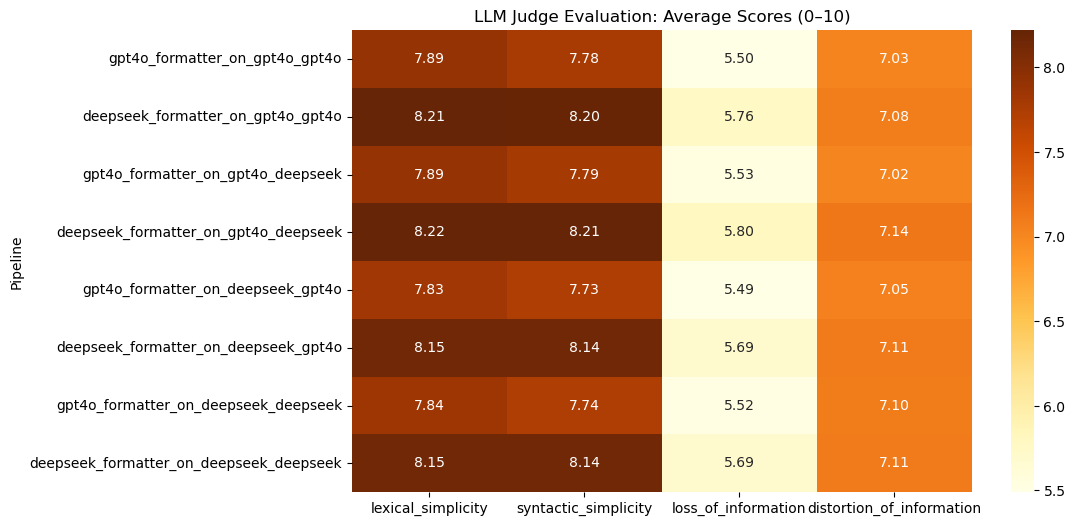

✅ LLM-as-judge scores saved to: pipeline_eval_results/LLM_as_judge_eval_results.json


In [16]:
from dotenv import load_dotenv
import os
from openai import OpenAI
import json

load_dotenv()
client = OpenAI(api_key=os.getenv("OPENAI_API_KEY"))

# Load data
with open("results/formatter_results.json", "r", encoding="utf-8") as f:
    formatted_outputs = json.load(f)

with open("../data/500_pairs.json", "r", encoding="utf-8") as f:
    gold_data = json.load(f)[:100]

# Define keys
pipeline_keys = [
    "gpt4o_formatter_on_gpt4o_gpt4o",
    "deepseek_formatter_on_gpt4o_gpt4o",
    "gpt4o_formatter_on_gpt4o_deepseek",
    "deepseek_formatter_on_gpt4o_deepseek",
    "gpt4o_formatter_on_deepseek_gpt4o",
    "deepseek_formatter_on_deepseek_gpt4o",
    "gpt4o_formatter_on_deepseek_deepseek",
    "deepseek_formatter_on_deepseek_deepseek",
]

def build_prompt(source, target, outputs_dict):
    lines = [
        "You are an expert medical reviewer trained to evaluate simplified clinical texts.",
        "You will evaluate each output based on the following four criteria, each scored 0–10:",
        "1. Lexical Simplicity (easy vocabulary)",
        "2. Syntactic Simplicity (simple sentence structure)",
        "3. Loss of Information (missing facts)",
        "4. Distortion of Information (wrong or misleading facts — 0 if severe)",
        "Output your scores in JSON like so: {\"pipeline_name\": {\"lexical_simplicity\": x, ...}}",
        "\nSource:\n" + source,
        "\nTarget:\n" + target,
        "\nModel Outputs:"
    ]
    for k, v in outputs_dict.items():
        lines.append(f"{k}: {v}")
    lines.append("\nPlease return your scores in the specified JSON format.")
    return "\n\n".join(lines)

def query_judge(prompt, model="gpt-4o"):
    try:
        response = client.chat.completions.create(
            model=model,
            messages=[
                {"role": "system", "content": "You are a precise evaluator."},
                {"role": "user", "content": prompt}
            ],
            temperature=0.0
        )
        content = response.choices[0].message.content.strip()
        
        # Strip triple backticks if present
        if content.startswith("```"):
            content = content.strip("`").split("json")[-1].strip()

        print("🔍 Cleaned content:\n", content[:300])
        return json.loads(content)
    except Exception as e:
        print("⚠️ Error:", e)
        return None

# Initialize results
results_per_pipeline = {
    k: {
        "lexical_simplicity": [],
        "syntactic_simplicity": [],
        "loss_of_information": [],
        "distortion_of_information": [],
    } for k in pipeline_keys
}

# Loop over all examples
for i in tqdm(range(len(gold_data)), desc="LLM Judging"):
    entry = formatted_outputs[i]
    source = gold_data[i]["source"]
    target = gold_data[i]["target"]
    outputs_dict = {k: entry[k] for k in pipeline_keys}

    prompt = build_prompt(source, target, outputs_dict)
    scores = query_judge(prompt)

    if scores:
        for k in pipeline_keys:
            try:
                for metric in results_per_pipeline[k]:
                    score = float(scores[k][metric])
                    results_per_pipeline[k][metric].append(score)
            except:
                print(f"⚠️ Skipped malformed entry at index {i}, key: {k}")
    else:
        print(f"❌ Failed at index {i}")

# Aggregate
rows = []
for k in pipeline_keys:
    metrics = results_per_pipeline[k]
    avg_metrics = {
        m: round(sum(metrics[m]) / max(len(metrics[m]), 1), 2)
        if metrics[m] else 0.01
        for m in metrics
    }
    rows.append({"Pipeline": k, **avg_metrics})

df = pd.DataFrame(rows)
df = df.set_index("Pipeline")

# Visualize
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(df, annot=True, cmap="YlOrBr", fmt=".2f")
plt.title("LLM Judge Evaluation: Average Scores (0–10)")
plt.show()

output_dir = Path("pipeline_eval_results")
output_dir.mkdir(parents=True, exist_ok=True)

llm_judge_path = output_dir / "LLM_as_judge_eval_results.json"
with open(llm_judge_path, "w", encoding="utf-8") as f:
    json.dump(df.round(2).to_dict(orient="index"), f, indent=2)

print(f"✅ LLM-as-judge scores saved to: {llm_judge_path}")